<h1>Proyecto de Análisis de Datos - Exploración y optimización de ventas en Superstore</h1>
<h4>Rodrigo Baudino</h4>

<h2>Descripción del proyecto</h2>  


Este proyecto buscara a partir del procesamiento, manipulación y análisis de datos, obtener insights que puedan contribuir a una mejor toma de decisiones en el negocio analizado. Para ello, se utilizarán herramientas del ecosistema Python, incluyendo las librerías pandas para la manipulación de datos, seaborn y matplotlib.pyplot para la visualización estadística para la generación de gráficos.

Cada etapa del análisis será explicada en detalle en el momento en que se realice, desde la carga y el preprocesamiento de los datos hasta la creación de nuevas variables que aporten valor, el análisis exploratorio y las conclusiones finales. Se busca que el proceso sea comprensible y accesible para cualquier persona interesada en el tema, facilitando así su reproducción y adaptación a otros contextos.

<h2>Objetivos</h2>  

Evaluar el desempeño en ventas de los productos según categoría y subcategoría.  
Identificar y detectar estacionalidades en las ventas.  
Visualizar la fidelidad de los clientes.  
Comprender las relaciones entre las variables.  
Proponer acciones concretas para la mejora del negocio.


<h2>Fuentes</h2>

Para este análisis se utilizo un dataset llamado 'Superstore' extraido en formato csv desde kaggle.  
Link: https://www.kaggle.com/datasets/ishanshrivastava28/superstore-sales/data?select=Superstore.csv

## Índice  
1. Introducción  
2. Importación de librerías  
3. Carga de datos  
4. Preprocesamiento de datos   
5. Análisis exploratorio  
6. Insights y posibles acciones para la mejora del negocio
7. Conclusiones  

## Introducción
En la actualidad, frente a la constante e incesante generación de datos, se vuelve indispensable su análisis y comprensión para una toma de decisiones más informada y estratégica. Esta capacidad resulta clave para destacar frente a la competencia y detectar oportunidades de crecimiento. En este contexto, el presente proyecto tiene como objetivo analizar los datos de ventas y balances de un negocio, con el fin de identificar patrones de compra, tendencias y áreas de mejora. Para ello, se llevará a cabo un proceso que incluye la carga, el preprocesamiento y el análisis de los datos, permitiendo obtener información valiosa para optimizar la gestión comercial.

## Importación de librerias-

Este paso es fundamental, ya que permite importar las herramientas necesarias para la carga, transformación y análisis de los datos. A través de estas librerías será posible realizar desde operaciones básicas de manipulación hasta la generación de gráficos para una mejor comprensión de la información

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de datos

Se importa el archivo Superstore.csv y se carga su contenido en un DataFrame llamado df utilizando la biblioteca pandas. Esta estructura de datos permite realizar operaciones eficientes de manipulación, exploración y análisis, aprovechando las funcionalidades que ofrece pandas para el tratamiento de datos tabulares.

In [2]:
df_origlinal=pd.read_csv('Superstore.csv', encoding='Latin1')

In [3]:
# Se conserva el DataFrame original sin modificaciones para referencia futura.Las transformaciones y análisis se realizarán sobre una copia.
df=df_origlinal.copy()

Se realiza una revisión general del DataFrame utilizando métodos como df.info() y df.describe() con el fin de obtener información básica sobre la estructura del dataset: número de registros, tipos de datos, valores nulos y estadísticas descriptivas de las variables numéricas. Estas observaciones permiten tener un primer acercamiento al contenido del archivo antes de iniciar el proceso de preprocesamiento y análisis en profundidad.  
A su vez, se incluye una clasificación de las variables según su naturaleza (categórica, numérica, temporal o identificadora). Esta categorización es fundamental para orientar las transformaciones y técnicas analíticas que se aplicarán en las siguientes etapas del proyecto.

In [4]:
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
1          2  CA-2013-152156  09-11-2013  12-11-2013    Second Class   
2          3  CA-2013-138688  13-06-2013  17-06-2013    Second Class   
3          4  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
4          5  US-2012-108966  11-10-2012  18-10-2012  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2011-110422  22-01-2011  24-01-2011    Second Class   
9990    9991  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9991    9992  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9992    9993  CA-2014-121258  27-02-2014  04-03-2014  Standard Class   
9993    9994  CA-2014-119914  05-05-2014  10-05-2014    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


**Clasificación de Variables** 

Las variables serán clasificas acontinuación por tipo.
  
Clasificación por tipo
  
Categórica nominales:  
Country, City, State, Region, Category, Sub-Category y Segment.

Categórica ordinales:  
Ship Mode.  
  
Cuantitativa discreta:   
Quantity.

Cuantitativas continuas:  
Discount, Profit y Sales.

Temporales:  
Order Date y Ship Date.

Identificación:  
Row ID, Order ID, Customer ID, Product ID, Postal Code,Product Name y Customer Name.


## Preprocesamiento de datos

Luego de cargar los datos es importante revisar el dataframe para tratar de detectar irregularidades o inconsistencias, las cuales en caso de ser necesarias seran corregidas en la etapa de preprosesamiento del daframe. Que constara de subprocesos como son la identificación de variables, detección de anomalías y conversión de los datos.

**Detección y depuración del dataset: outliers, duplicados, valores nulos e inconsistentes**

Como primer paso, se analiza si existen valores nulos en el conjunto de datos que requieran la aplicación de estrategias de limpieza o imputación.

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

No se detectan valores nulos explícitos en el conjunto de datos, por lo que no es necesario aplicar técnicas de imputación ni realizar un tratamiento adicional en ese sentido. Asimismo, se revisaron los valores numéricos para descartar la presencia de nulos encubiertos, como podría ser el uso del valor 0 para representar datos faltantes. No se encontraron indicios que sugieran inconsistencias de este tipo.

A continuación, se verifica si el DataFrame contiene registros duplicados que deban ser eliminados para evitar distorsiones en el análisis.

In [8]:
df.duplicated().sum()

0

El DataFrame no presentan filas duplicadas, por lo tanto, no es necesario eliminar registros para evitar redundancias en la información.



Lo siguiente que se realizara es comprobar que cada variable del DataFrame tenga asignado el tipo de dato correcto (por ejemplo, int, float, object, datetime, etc.). En caso de que alguna columna haya sido interpretada incorrectamente durante la carga del archivo (por ejemplo, fechas como texto o números como cadenas), se procede a convertirla al tipo de dato correspondiente para asegurar la correcta manipulación y análisis de los datos.

In [9]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

Todas las columnas presentan el tipo de dato adecuado, con excepción de 'Order Date' y 'Ship Date'.Las cuales a continuación seran convertidas al formato datetime64[ns](día, mes y año) para permitir un correcto análisis temporal.

In [10]:
#Se revisaran unicamente las columnas de tipo object, ya que este es el caso de order date y ship date.
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_datetime(df[col], format='%d-%m-%Y', errors='raise')
        print(f"La columna '{col}' fue convertiva a formato  datetime64[ns].")
    except Exception:
        print(f"La columna '{col}' contiene texto (strings).")



La columna 'Order ID' contiene texto (strings).
La columna 'Order Date' fue convertiva a formato  datetime64[ns].
La columna 'Ship Date' fue convertiva a formato  datetime64[ns].
La columna 'Ship Mode' contiene texto (strings).
La columna 'Customer ID' contiene texto (strings).
La columna 'Customer Name' contiene texto (strings).
La columna 'Segment' contiene texto (strings).
La columna 'Country' contiene texto (strings).
La columna 'City' contiene texto (strings).
La columna 'State' contiene texto (strings).
La columna 'Region' contiene texto (strings).
La columna 'Product ID' contiene texto (strings).
La columna 'Category' contiene texto (strings).
La columna 'Sub-Category' contiene texto (strings).
La columna 'Product Name' contiene texto (strings).


In [11]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

La conversión de las columnas de fecha se realizó de manera exitosa. Como paso siguiente, es importante verificar que la fecha de envío (Ship Date) sea posterior o igual a la fecha de orden (Order Date) en todos los registros, con el fin de asegurar la coherencia temporal de los datos y descartar posibles inconsistencias.

In [12]:
df[df['Ship Date'] < df['Order Date']]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


Ningúna ordén de compra es posterior a la llegada del producto. En caso de que se hubieran encontrado un error de esa indole, una posible solución sencilla y robusta hubiera sido imputar una fecha de envio posterior a la de compra utilizando como valor la mediana del tiempo demorado según, el tipo de envio.

El siguiente paso consiste en identificar la presencia de valores atípicos (outliers) dentro del dataset. Una vez detectados, se evaluará si estos valores corresponden a errores o anomalías que requieran tratamiento, imputación o eliminación, o si, por el contrario, representan casos reales y válidos que se deben conservarse para no sesgar el análisis.

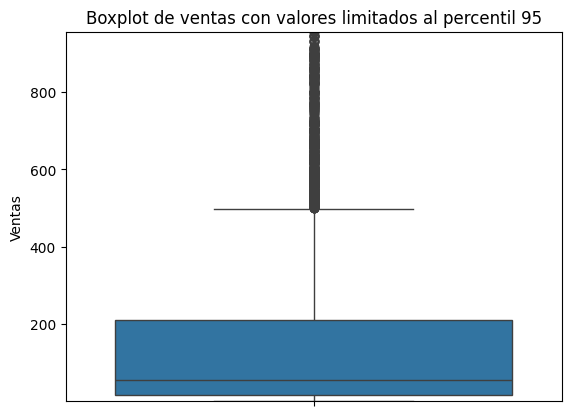

In [13]:
#Revisión de outliers sobre la variable 'Sales'.
sns.boxplot(df,y='Sales')
plt.ylim(df['Sales'].quantile(0), df['Sales'].quantile(0.95))
plt.title('Boxplot de ventas con valores limitados al percentil 95')
plt.ylabel('Ventas')    

plt.show()


In [14]:
#Tomamos la mediana de las ventas como valor de referencia.
print(df['Sales'].median())

54.489999999999995


In [15]:
print(df['Sales'].quantile(0.75))

209.94


In [16]:
#Se calcula el rango intercuartílico para observar que porcentaje de las ventas son outliers.
Q1=df['Sales'].quantile(0.25)
Q3=df['Sales'].quantile(0.75)
IQR=Q3-Q1
limite_inferior=Q1-1.5*IQR
limite_superior=Q3+1.5*IQR
print(f'limite_superior:{limite_superior}')
print(f'limite_inferior:{limite_inferior}')
outliers=len(df[df['Sales']>limite_superior]) 
print(f'Outliers: {outliers /len(df)*100:.2f}%')  

limite_superior:498.93
limite_inferior:-271.71000000000004
Outliers: 11.68%


Se tomó solo el 95% de los datos inferiores para la visualización, ya que la presencia de valores extremadamente altos dificultaba la interpretación del boxplot. Esto permite observar la distribución de la mayoría de las ventas sin distorsión.

Si bien se identifican outliers, estos son inherentes a la naturaleza del negocio, donde la mayoría de las compras corresponden a montos pequeños. De hecho, la mediana de las ventas es de 54.5. Dado que estos valores atípicos representan transacciones reales, no deben eliminarse ni imputarse, sino considerarse en el análisis.


En este caso, los outliers se encuentran por encima del límite superior, ya que no pueden existir ventas con valores negativos ni iguales a cero. Estos representan el 11.68% del total de ventas.

Text(0, 0.5, 'Cantidad')

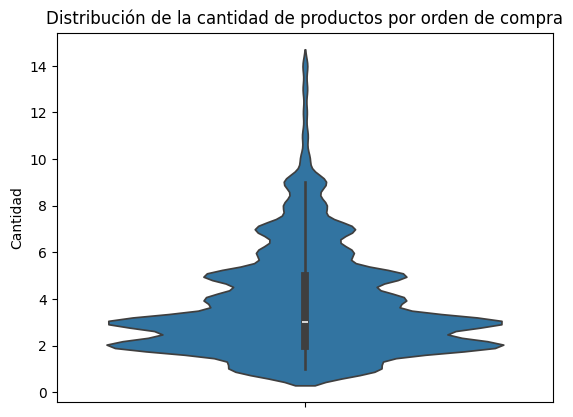

In [17]:
#Análisis de outliers sobre la variable 'Quantity'.
sns.violinplot(df, y='Quantity')
plt.title('Distribución de la cantidad de productos por orden de compra')
plt.ylabel('Cantidad')

La cantidad de productos no presenta valores negativos, lo que indica que no hay errores evidentes en la carga de datos. Además, no se observan valores extremadamente altos que sugieran un posible error en el ingreso de información.

Text(0, 0.5, 'Descuento')

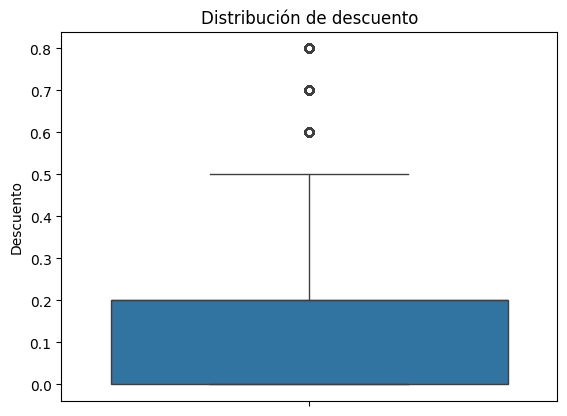

In [18]:
#Visualización de outliers sobre la variable 'Discount'.
sns.boxplot(df, y='Discount')
plt.title('Distribución de descuento')
plt.ylabel('Descuento')


Los valores atípicos corresponden a descuentos reales, pero se presentan en un porcentaje muy pequeño de productos y en momentos específicos. Por ello, no hay motivo para pensar que sean errores en el registro de los datos.

Para que el siguiente boxplot de Profit sea más comprensible, es necesario extraer los valores atípicos únicamente del gráfico, sin eliminarlos del análisis. Aunque son valores extremos, deben ser considerados, ya que representan datos reales y pueden aportar información valiosa en el estudio.

Text(0.5, 1.0, 'boxplot de ganancias sin valores atípicos extremos')

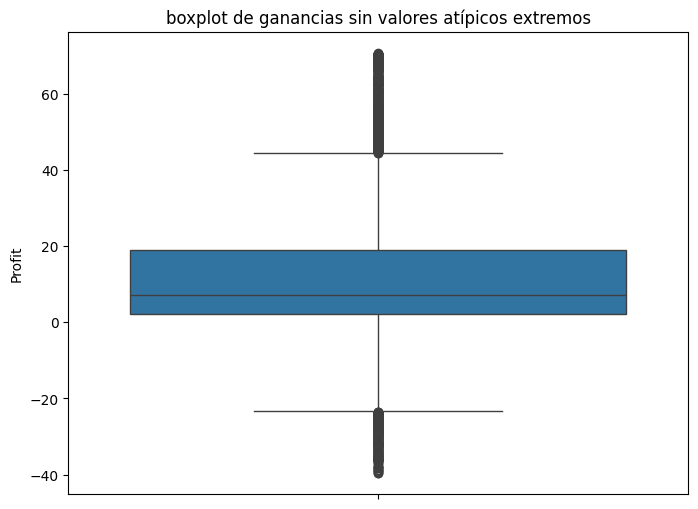

In [19]:
#Visualización de los valores de la variable 'Profit', extrayendo los outliers.
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['Profit'] >= lower_bound) & (df['Profit'] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_filtered['Profit'])
plt.title('boxplot de ganancias sin valores atípicos extremos')


**Mapeo de categorías a español**  

Se modificarán los nombres de las variables y sus valores para traducirlos del inglés al español, con el objetivo de facilitar la comprensión y favorecer un análisis exploratorio más claro y accesible.

In [20]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [21]:
df.rename(columns={'Row ID': 'ID_registro',
    'Order ID': 'ID_pedido',
    'Order Date': 'Fecha_pedido',
    'Ship Date': 'Fecha_envio',
    'Ship Mode': 'Forma_envío',
    'Customer ID': 'ID_cliente',
    'Customer Name': 'Nombre_cliente',
    'Segment': 'Tipo_cliente',
    'Country': 'País',
    'City': 'Ciudad',
    'State': 'Estado',
    'Postal Code': 'Código_postal',
    'Region': 'Región',
    'Product ID': 'ID_producto',
    'Category': 'Categoría',
    'Sub-Category': 'Subcategoría',
    'Product Name': 'Nombre_producto',
    'Sales': 'Ventas',
    'Quantity': 'Cantidad',
    'Discount': 'Descuento',
    'Profit': 'Balance'},inplace=True)


In [22]:
print(df)

      ID_registro       ID_pedido Fecha_pedido Fecha_envio     Forma_envío  \
0               1  CA-2013-152156   2013-11-09  2013-11-12    Second Class   
1               2  CA-2013-152156   2013-11-09  2013-11-12    Second Class   
2               3  CA-2013-138688   2013-06-13  2013-06-17    Second Class   
3               4  US-2012-108966   2012-10-11  2012-10-18  Standard Class   
4               5  US-2012-108966   2012-10-11  2012-10-18  Standard Class   
...           ...             ...          ...         ...             ...   
9989         9990  CA-2011-110422   2011-01-22  2011-01-24    Second Class   
9990         9991  CA-2014-121258   2014-02-27  2014-03-04  Standard Class   
9991         9992  CA-2014-121258   2014-02-27  2014-03-04  Standard Class   
9992         9993  CA-2014-121258   2014-02-27  2014-03-04  Standard Class   
9993         9994  CA-2014-119914   2014-05-05  2014-05-10    Second Class   

     ID_cliente    Nombre_cliente Tipo_cliente           País  

In [23]:
df['Forma_envío'] = df['Forma_envío'].map({
    'First Class': 'Primera Clase',
    'Second Class': 'Segunda Clase',
    'Standard Class': 'Clase Estándar',
    'Same Day': 'Mismo Día'
})

In [24]:
df['Tipo_cliente'] = df['Tipo_cliente'].map({
    'Consumer': 'Consumidor',
    'Corporate': 'Corporativo',
    'Home Office': 'Empresa de trabajo remoto'
})

In [25]:
df['Región'] = df['Región'].map({
    'West': 'Oeste',
    'East': 'Este',
    'Central': 'Centro',
    'South': 'Sur'
})


In [26]:
df['Categoría'] = df['Categoría'].map({
    'Furniture': 'Muebles',
    'Office Supplies': 'Suministros de Oficina',
    'Technology': 'Tecnología'
})


In [27]:
df['Subcategoría'] = df['Subcategoría'].map({
    'Bookcases': 'Estanterías',
    'Chairs': 'Sillas',
    'Furnishings': 'Decoración',
    'Tables': 'Mesas',
    'Binders': 'Carpetas',
    'Paper': 'Papel',
    'Art': 'Arte',
    'Labels': 'Etiquetas',
    'Storage': 'Almacenamiento',
    'Appliances': 'Electrodomésticos',
    'Envelopes': 'Sobres',
    'Fasteners': 'Sujetadores',
    'Supplies': 'Insumos',
    'Accessories': 'Accesorios',
    'Copiers': 'Fotocopiadoras',
    'Machines': 'Máquinas',
    'Phones': 'Teléfonos'
})


In [28]:
df['País'] = df['País'].map({'United States': 'Estados Unidos'})

In [29]:
df

,ID_registro,ID_pedido,Fecha_pedido,Fecha_envio,Forma_envío,ID_cliente,Nombre_cliente,Tipo_cliente,País,Ciudad,...,Código_postal,Región,ID_producto,Categoría,Subcategoría,Nombre_producto,Ventas,Cantidad,Descuento,Balance
0,1,CA-2013-152156,2013-11-09,2013-11-12,Segunda Clase,CG-12520,Claire Gute,Consumidor,Estados Unidos,Henderson,...,42420,Sur,FUR-BO-10001798,Muebles,Estanterías,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Segunda Clase,CG-12520,Claire Gute,Consumidor,Estados Unidos,Henderson,...,42420,Sur,FUR-CH-10000454,Muebles,Sillas,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Segunda Clase,DV-13045,Darrin Van Huff,Corporativo,Estados Unidos,Los Angeles,...,90036,Oeste,OFF-LA-10000240,Suministros de Oficina,Etiquetas,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Clase Estándar,SO-20335,Sean O'Donnell,Consumidor,Estados Unidos,Fort Lauderdale,...,33311,Sur,FUR-TA-10000577,Muebles,Mesas,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Clase Estándar,SO-20335,Sean O'Donnell,Consumidor,Estados Unidos,Fort Lauderdale,...,33311,Sur,OFF-ST-10000760,Suministros de Oficina,Almacenamiento,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2011-110422,2011-01-22,2011-01-24,Segunda Clase,TB-21400,Tom Boeckenhauer,Consumidor,Estados Unidos,Miami,...,33180,Sur,FUR-FU-10001889,Muebles,Decoración,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2014-121258,2014-02-27,2014-03-04,Clase Estándar,DB-13060,Dave Brooks,Consumidor,Estados Unidos,Costa Mesa,...,92627,Oeste,FUR-FU-10000747,Muebles,Decoración,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2014-121258,2014-02-27,2014-03-04,Clase Estándar,DB-13060,Dave Brooks,Consumidor,Estados Unidos,Costa Mesa,...,92627,Oeste,TEC-PH-10003645,Tecnología,Teléfonos,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2014-121258,2014-02-27,2014-03-04,Clase Estándar,DB-13060,Dave Brooks,Consumidor,Estados Unidos,Costa Mesa,...,92627,Oeste,OFF-PA-10004041,Suministros de Oficina,Papel,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


No se tradujeron los nombres de los productos debido a su gran cantidad y a que muchos de ellos poseen descripciones extensas o sin una traducción directa al español.

**Creación de Variables Nuevas**  

Se creará una nueva variable que clasifica a los clientes según la frecuencia de sus compras en Superstore. Esta variable permitirá identificar si un cliente es ocasional, regular o fiel.

Esta clasificación será útil para visualizar el tipo de público al que nos dirigimos y facilitar segmentaciones en el análisis.

In [30]:
print(df['Fecha_pedido'].max()-df['Fecha_pedido'].min())

1457 days 00:00:00


Teniendo en cuenta que tenemos ordenes de los ultimos cuatro años desde la fecha ultima orden de compra a la primera. Vamos a dividir en tres grupos, ocasional, regular y fiel.Se considerara ocasional a los que han realizado 12 compras o menos  en ese periodo. Regular al que hizo entre 13 y 18 y fiel en casos de 19 o más.

In [31]:
df['ID_cliente'].value_counts()

ID_cliente
WB-21850    37
JL-15835    34
MA-17560    34
PP-18955    34
CK-12205    32
            ..
LD-16855     1
AO-10810     1
CJ-11875     1
RE-19405     1
JR-15700     1
Name: count, Length: 793, dtype: int64

In [32]:
compras_por_cliente = df['ID_cliente'].value_counts()

def clasificar_cliente(n):
    if n <= 12:
        return 'Baja'
    elif n <= 18:
        return 'Media'
    else:
        return 'Alta'

clasificacion = compras_por_cliente.apply(clasificar_cliente)

df['Lealtad_cliente'] = df['ID_cliente'].map(clasificacion)

In [33]:
clientes_lealtad = clasificacion.reset_index()
clientes_lealtad.columns = ['ID_cliente', 'Lealtad_cliente']
conteo_clientes = clientes_lealtad['Lealtad_cliente'].value_counts()
print("Cantidad de clientes por nivel de lealtad:")
print(conteo_clientes)

Cantidad de clientes por nivel de lealtad:
Lealtad_cliente
Baja     430
Media    226
Alta     137
Name: count, dtype: int64


Esta variable será de gran utilidad para la elaboración de gráficos y facilitará la visualización e interpretación de los datos.

Una vez finalizada la etapa de preprocesamiento de datos, se puede avanzar con el siguiente paso: el análisis exploratorio de datos (EDA).

## Análisis exploratorio de datos

El análisis de datos es una etapa clave para descubrir tendencias, identificar relaciones entre variables, visualizar la información de forma gráfica y revalorizar el contenido del dataset.

Para este análisis, los valores extremos que dificultan la comprensión de las visualizaciones serán excluidos únicamente de los gráficos, pero se mantendrán en el conjunto de datos para el cálculo de métricas y el análisis general.

Text(0.5, 0, 'Tipos de clientes')

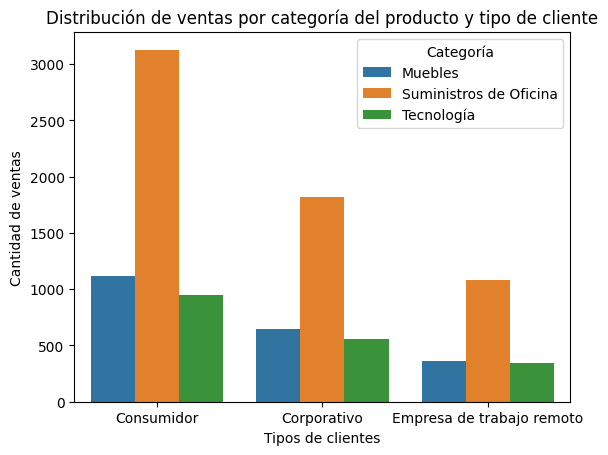

In [34]:
#Countplot de cantidad de ventas por categoría del producto y tipo de cliente.
sns.countplot(df,x='Tipo_cliente',hue='Categoría')
plt.title('Distribución de ventas por categoría del producto y tipo de cliente')
plt.ylabel('Cantidad de ventas')
plt.xlabel('Tipos de clientes')

In [35]:
clientes_por_tipo = df.groupby('Tipo_cliente')['ID_cliente'].nunique()
print(clientes_por_tipo/clientes_por_tipo.sum())

Tipo_cliente
Consumidor                   0.515763
Corporativo                  0.297604
Empresa de trabajo remoto    0.186633
Name: ID_cliente, dtype: float64


El 51% de los clientes son consumidores, el 30% corresponden a empresas que trabajan de manera presencial, mientras que el otro 19% son empresas con formato de trabajo home office.

In [36]:
conteo_por_categoría = df.groupby('Categoría')['ID_registro'].count()
print(conteo_por_categoría/conteo_por_categoría.sum())

Categoría
Muebles                   0.212227
Suministros de Oficina    0.602962
Tecnología                0.184811
Name: ID_registro, dtype: float64


El 60% de las compras corresponden a la categoría de suministros de oficina, poco más del 21% a venta de muebles y lo restante a productos de tecnología.

Text(0.5, 0, 'Tipos de clientes')

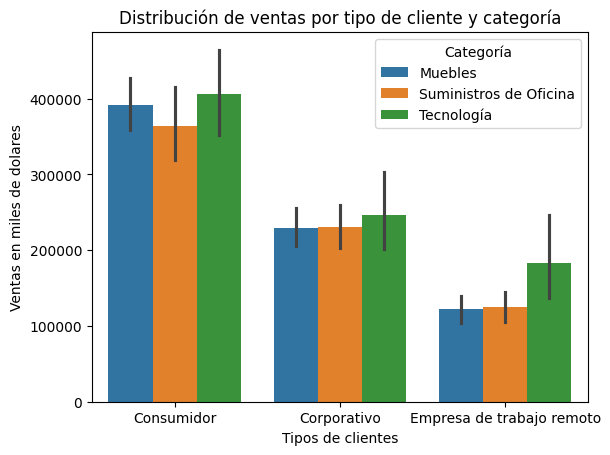

In [37]:
#Barplot de ventas por tipo de cliente y categoría.
sns.barplot(df,x='Tipo_cliente',y='Ventas',hue='Categoría',estimator=sum)
plt.title('Distribución de ventas por tipo de cliente y categoría')
plt.ylabel('Ventas en miles de dolares')
plt.xlabel('Tipos de clientes')

In [38]:
ventas_por_categoría = df.groupby('Categoría')['Ventas'].sum()
print(ventas_por_categoría)

Categoría
Muebles                   741999.7953
Suministros de Oficina    719047.0320
Tecnología                836154.0330
Name: Ventas, dtype: float64


A primera vista, uno podría suponer que los suministros de oficina son los que más ingresos generan, ya que suelen tener mayor volumen de ventas. Sin embargo, este gráfico revela que en términos de valor monetario total, las tres categorías generan montos similares.

De hecho, los productos de tecnología tienden a superar levemente a las demás categorías en todos de los segmentos, lo que sugiere que, aunque se vendan en menor cantidad, tienen un precio unitario más elevado que contribuye significativamente a los ingresos por ventas totales.

Text(0.5, 0, 'Tipos de clientes')

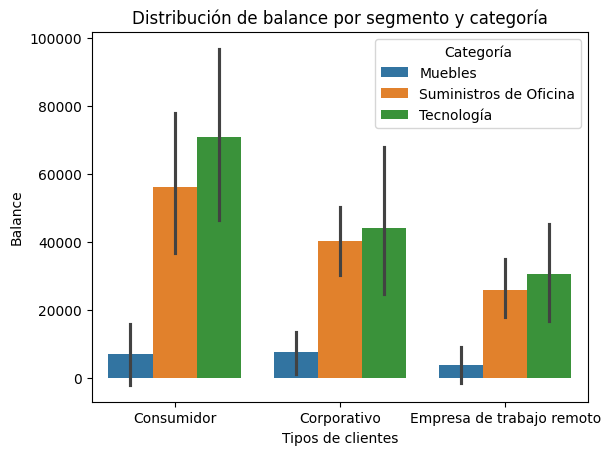

In [39]:
#Barplot de balance por categoría y tipo de cliente.
sns.barplot(df,x='Tipo_cliente',y='Balance',hue='Categoría',estimator=sum)
plt.title('Distribución de balance por segmento y categoría')
plt.xlabel('Tipos de clientes')

In [40]:
balance_por_categoria = df.groupby('Categoría')['Balance'].sum()
print(balance_por_categoria)

Categoría
Muebles                    18451.2728
Suministros de Oficina    122490.8008
Tecnología                145454.9481
Name: Balance, dtype: float64


In [41]:
print(balance_por_categoria/balance_por_categoria.sum())

Categoría
Muebles                   0.064426
Suministros de Oficina    0.427696
Tecnología                0.507879
Name: Balance, dtype: float64


Este gráfico permite identificar con claridad que las categorías más rentables para la tienda son suministros de oficina y, especialmente, tecnología. Estas dos categorías concentran prácticamente todas las ganancias del negocio. En contraste, la categoría Muebles muestra un rendimiento significativamente menor, generando beneficios muy bajos.
A partir de este análisis, sería recomendable que la empresa reoriente su estrategia comercial, priorizando la promoción y venta de productos tecnológicos y suministros de oficina, que son los verdaderos impulsores de rentabilidad.
De esta manera ademas reduciria costos de envios y reduciría costes en los almacenes al no seguir con la venta de muebles.

Text(0.5, 1.0, 'Descuentos según la categoría de producto')

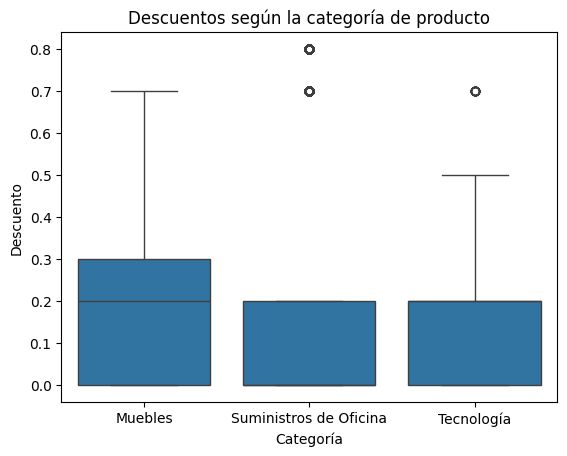

In [42]:
#Bloxplot de la variable de descuentos segun la categoría del producto.
sns.boxplot(df,x='Categoría',y='Descuento')
plt.title('Descuentos según la categoría de producto')

Se puede observar que la categoría de muebles presenta una mayor variabilidad en los descuentos, y que en muchos casos estos son más elevados que en otras categorías. Esta estrategia puede ser uno de los motivos por los cuales las ganancias en la venta de muebles son tan reducidas. Una posible solución a esta problematica podría ser la reducción en cuanto a el total de muebles a la venta pero vender los mismos con menores decuentos y de esta forma ahorrar espacio, mantener ganancias similares, generar una reducción de gastos operativos y favorecer a menores riezgos de perdidas económicas.
A continuación se  verá la relación entre el balance y los descuentos, para ver si son el principal motivo por el cual los muebles no son rentables.

Text(0.5, 1.0, 'Relación entre el descuento y el balance')

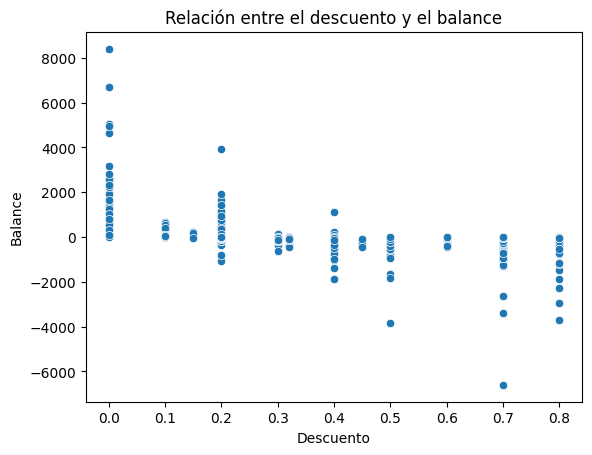

In [43]:
#Scatterplot de la relación entre el descuento y el balance.
sns.scatterplot(df,y='Balance',x='Descuento')
plt.title('Relación entre el descuento y el balance')

In [44]:
df[['Descuento','Balance']].corr()


,Descuento,Balance
Descuento,1.000000,-0.219487
Balance,-0.219487,1.000000


El coeficiente de correlación entre las variables descuento y ganancia es de aproximadamente -0.22, lo cual indica una relación negativa muy débil.
Esto sugiere que, en general, a mayores descuentos podrían esperarse ganancias levemente menores, pero no hay evidencia de que los descuentos generen pérdidas abruptas.
Por lo tanto, los descuentos no parecen ser el principal factor responsable de las pérdidas, al menos no de forma directa y contundente.

Text(0.5, 1.0, 'Relación entre ventas y balance por categoría')

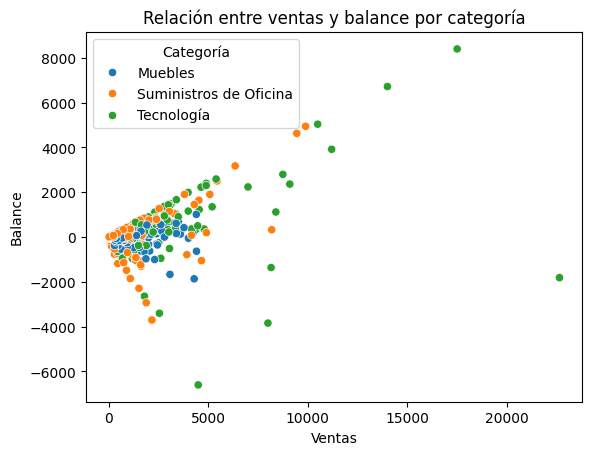

In [45]:
#Scatterplot de la relación entre ventas y balance segun la categoría del producto.
sns.scatterplot(df,x='Ventas', y='Balance', hue='Categoría')
plt.title('Relación entre ventas y balance por categoría')

In [46]:
df[['Ventas','Balance']].corr()

,Ventas,Balance
Ventas,1.000000,0.479064
Balance,0.479064,1.000000


El coeficiente de correlación entre ventas y ganancias es de aproximadamente 0.47, lo que indica una relación moderadamente positiva.
Esto significa que un aumento en las ventas suele ir acompañado de un aumento en las ganancias, aunque existen otros factores que pueden intervenir en la rentabilidad final, como los descuentos aplicados o los costos operativos de cada producto.

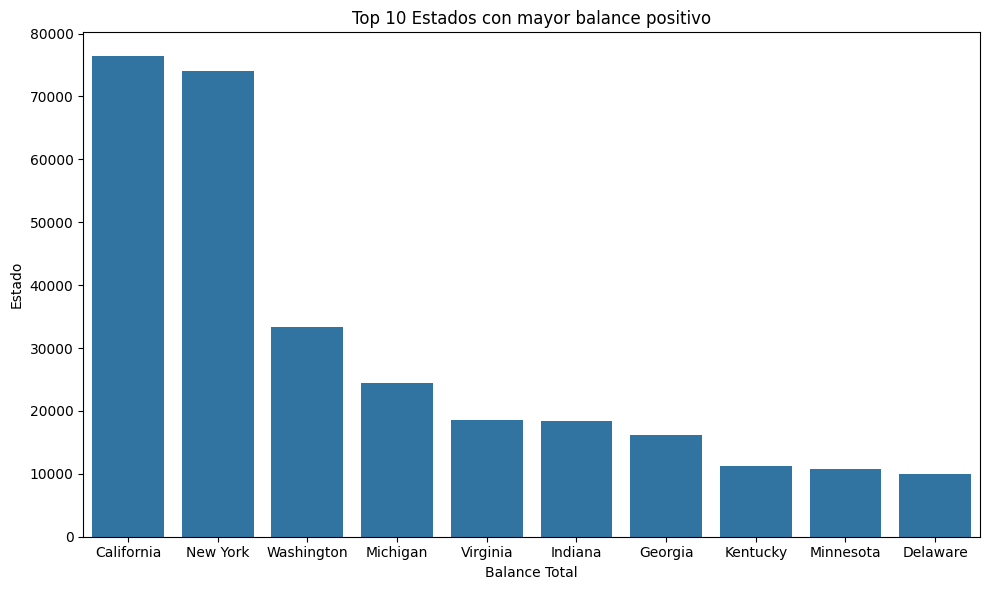

In [47]:
# Barplot de beneficios segun Estado.
balance_por_estado = df.groupby("Estado")["Balance"].sum().sort_values(ascending=False).head(10)
balance_por_estado = balance_por_estado.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=balance_por_estado, x="Estado", y="Balance")
plt.title("Top 10 Estados con mayor balance positivo")
plt.xlabel("Balance Total")
plt.ylabel("Estado")
plt.tight_layout()
plt.show()

El análisis del balance por estado revela que las ganancias están altamente concentradas en unos pocos estados, lo que sugiere una desigual distribución geográfica de la rentabilidad. Este hallazgo representa una oportunidad para reforzar la presencia en los estados más rentables, al tiempo que se podrían implementar estrategias específicas para mejorar el rendimiento en regiones con menor rentabilidad.
Por ejemplo, Washington, un estado con alta población y buen nivel económico, presenta un bajo nivel de balance generado en comparación con su potencial. Esto podría indicar una subrepresentación del negocio en la zona, lo que amerita una exploración más profunda y posibles campañas de expansión local.

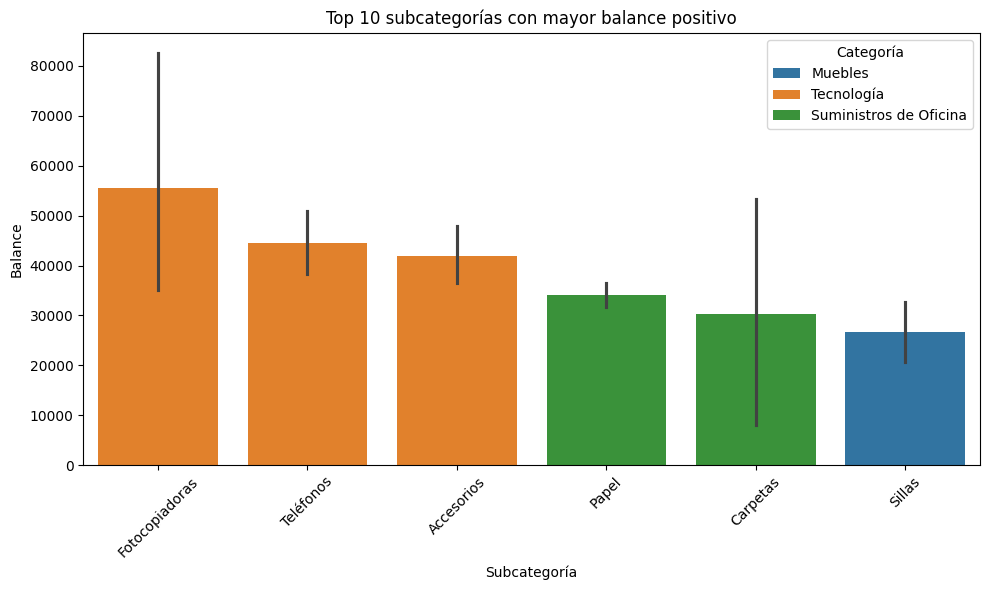

In [48]:
# Top 5 subcategorías con mayores balances.
top_5 = df.groupby('Subcategoría')['Balance'].sum().sort_values(ascending=False).head(6).index
df_top10 = df[df['Subcategoría'].isin(top_5)]

plt.figure(figsize=(10, 6))
sns.barplot(data=df_top10, x='Subcategoría', y='Balance', estimator=sum, hue='Categoría', order=top_5)
plt.title('Top 10 subcategorías con mayor balance positivo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
balance_subcategorias = df.groupby('Subcategoría')['Balance'].sum().sort_values(ascending=False)
top_3_subcategorias = balance_subcategorias.head(3)
suma_top_3 = top_3_subcategorias.sum()
balance_total = df['Balance'].sum()
porcentaje = (suma_top_3 / balance_total) * 100
print(porcentaje)

49.6060295448247


Se puede observar que las tres principales subcategorías representan el 49.6 % de los beneficios. Por lo tanto, en caso de una inyección de capital, ya sea mediante campañas de marketing o inversiones para ampliar la variedad de productos, podría ser una excelente opción favorecer las subcategorías de fotocopiadoras, teléfonos y accesorios.



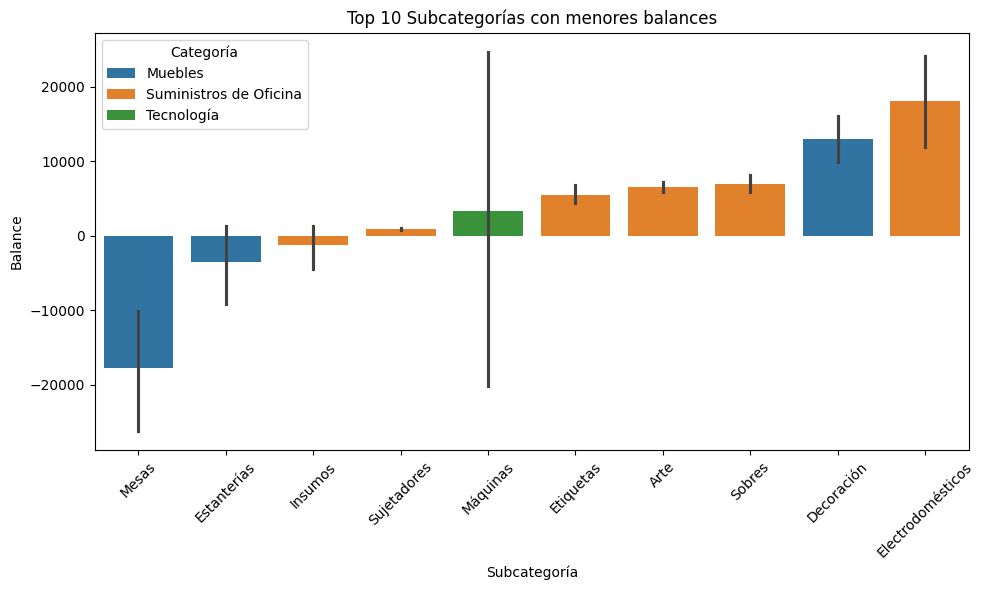

In [50]:
# Top 10 subcategorías con menores balances.
peores_10 = df.groupby('Subcategoría')['Balance'].sum().sort_values().head(10).index
df_peores10 = df[df['Subcategoría'].isin(peores_10)]

plt.figure(figsize=(10, 6))
sns.barplot(data=df_peores10, x='Subcategoría', y='Balance', estimator=sum, hue='Categoría', order=peores_10)
plt.title('Top 10 Subcategorías con menores balances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Las siguientes subcategorías deberían ser revisadas debido a su bajo o negativo rendimiento económico, ya que podrían representar un riesgo o un gasto innecesario para el negocio.

En el caso de las mesas, se recomienda que solo se ofrezcan en conjunto con sillas, ya que venderlas por separado ha demostrado generar pérdidas. Esta estrategia permitiría reducir el riesgo económico asociado, al tiempo que se aprovecha la alta rentabilidad de las sillas, una de las subcategorías más destacadas en términos de ganancias.

En el caso de las subcategorías como estanterías, insumos, sujetadores y máquinas, sería conveniente evaluar su continuidad en el catálogo. Se recomienda considerar su eliminación, la reducción de gastos asociados o el aumento de su precio de venta, con el objetivo de revertir su bajo o negativo rendimiento económico y volverlas rentables.

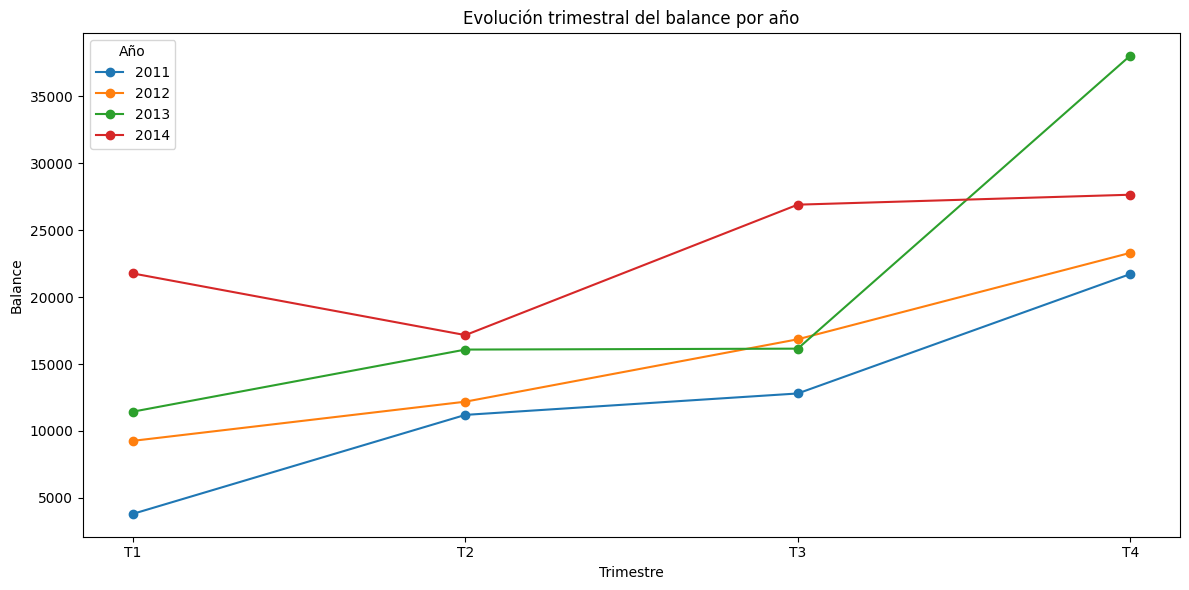

In [51]:
#Lineplot de la evolución de las ventas por año y trimestre.
df['Fecha_pedido'] = pd.to_datetime(df['Fecha_pedido'])
temp = df.copy()
temp['Año'] = temp['Fecha_pedido'].dt.year
temp['Trimestre'] = temp['Fecha_pedido'].dt.quarter
balance_trimestral = temp.groupby(['Año', 'Trimestre'])['Balance'].sum().reset_index()
pivot_df = balance_trimestral.pivot(index='Año', columns='Trimestre', values='Balance')
pivot_df = pivot_df[[1, 2, 3, 4]]
pivot_df.columns = ['T1', 'T2', 'T3', 'T4']

plt.figure(figsize=(12, 6))
for año in pivot_df.index:
    plt.plot(['T1', 'T2', 'T3', 'T4'], pivot_df.loc[año], marker='o', label=año)
plt.title('Evolución trimestral del balance por año')
plt.xlabel('Trimestre')
plt.ylabel('Balance')
plt.legend(title='Año')
plt.tight_layout()
plt.show()

A lo largo de los años se observa una tendencia general de aumento en los beneficios, lo cual podría indicar un crecimiento sostenido del negocio. Además, se nota una mayor estabilidad en los últimos años, con menores fluctuaciones entre trimestres.
En cuanto a la estacionalidad, los primeros dos trimestres suelen ser los de menor beneficio, mientras que el cuarto trimestre muestra consistentemente los valores más altos. Este patrón podría relacionarse con eventos comerciales festivos como navidad y el fesjo de año nuevo, acompañado de promociones.

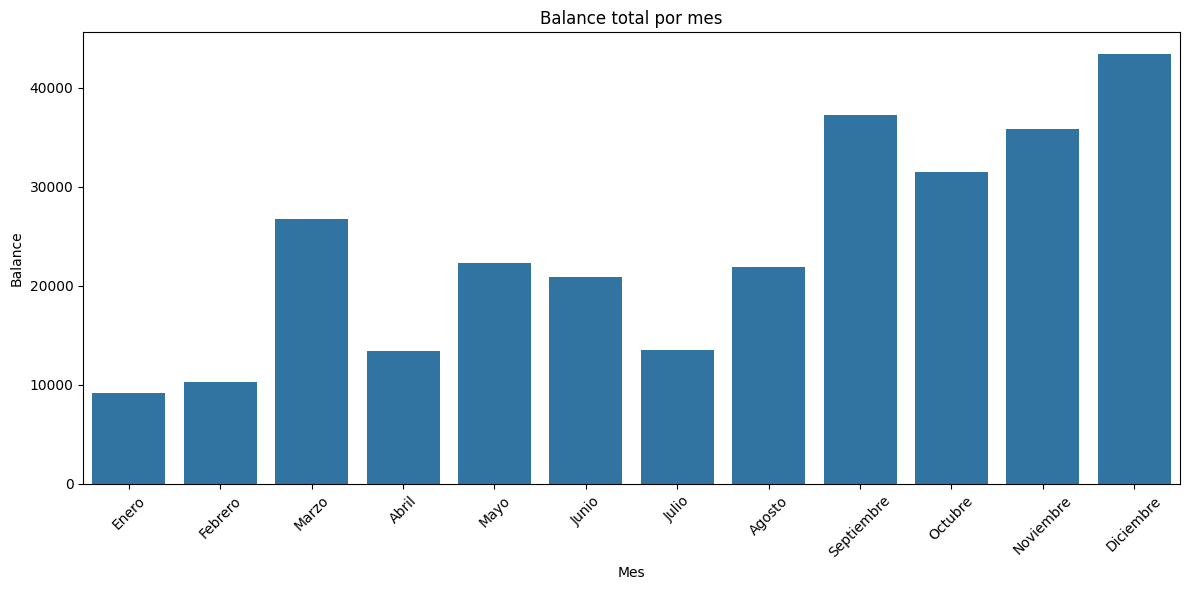

In [52]:
#Barplot de la evolución del balance,juntando todos los años.
balance_por_mes = df.groupby(df['Fecha_pedido'].dt.month)['Balance'].sum().reset_index()
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
balance_por_mes['Mes_nombre'] = balance_por_mes['Fecha_pedido'].map(meses)
balance_por_mes['Mes_nombre'] = pd.Categorical(
    balance_por_mes['Mes_nombre'],
    categories=list(meses.values()),
    ordered=True
)
balance_por_mes = balance_por_mes.sort_values('Mes_nombre')
plt.figure(figsize=(12,6))
sns.barplot(data=balance_por_mes, x='Mes_nombre', y='Balance')
plt.title('Balance total por mes')
plt.xlabel('Mes')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En este último gráfico se observa con mayor claridad el aumento del balance durante el último cuatrimestre de cada año. Este patrón sugiere una oportunidad estratégica para reforzar los recursos operativos en esa etapa, como la incorporación de personal temporal o la inyección de capital. Esto podría potenciar aún más las ventas en un período ya favorable y, paralelamente, permitir una mejor planificación del inventario, reduciendo el stock en los trimestres con menor demanda. Estas acciones no solo apuntan a maximizar ingresos, sino también a optimizar los gastos operativos anuales.

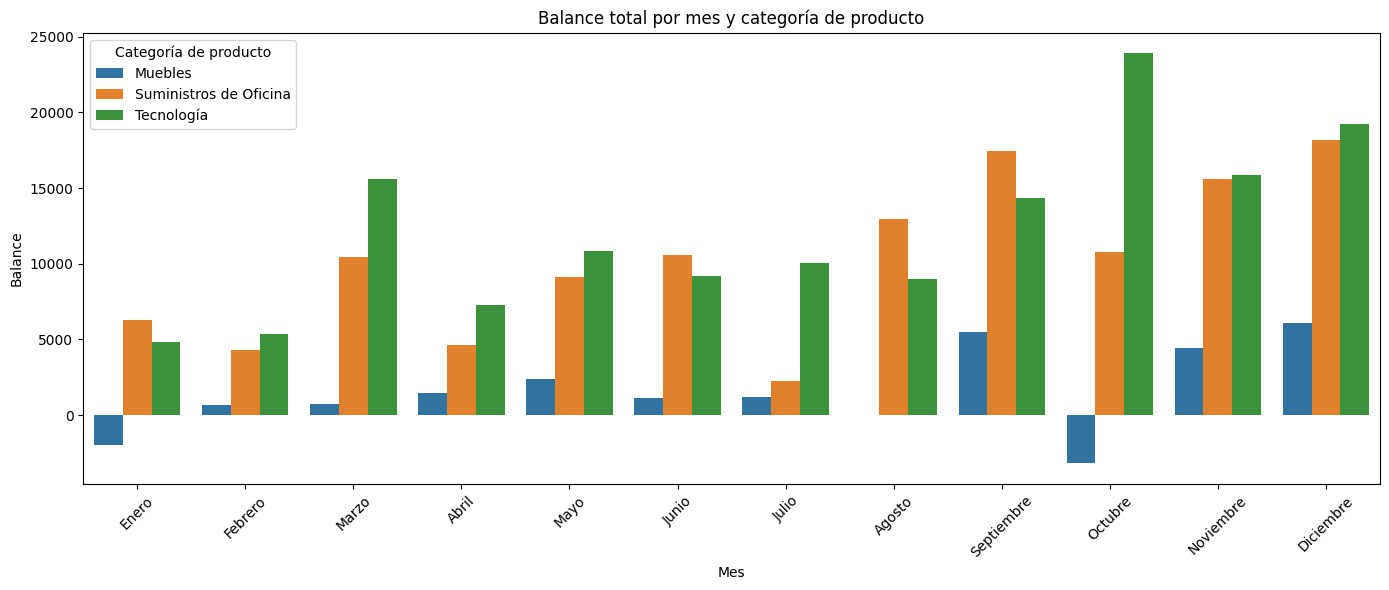

In [53]:
#Barplot de la evolución del balance por mes y categoría, juntando todos los años.
balance_mes_categoria = df.groupby([
    df['Fecha_pedido'].dt.month,
    'Categoría'
])['Balance'].sum().reset_index()
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
balance_mes_categoria['Mes_nombre'] = balance_mes_categoria['Fecha_pedido'].map(meses)
balance_mes_categoria['Mes_nombre'] = pd.Categorical(
    balance_mes_categoria['Mes_nombre'],
    categories=list(meses.values()),
    ordered=True
)
balance_mes_categoria = balance_mes_categoria.sort_values('Mes_nombre')
plt.figure(figsize=(14, 6))
sns.barplot(
    data=balance_mes_categoria,
    x='Mes_nombre',
    y='Balance',
    hue='Categoría'
)
plt.title('Balance total por mes y categoría de producto')
plt.xlabel('Mes')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.legend(title='Categoría de producto')
plt.tight_layout()
plt.show()

Tecnología se destaca como la categoría más rentable en casi todos los meses, especialmente en octubre, donde alcanza su pico máximo.

Suministros de Oficina presenta un comportamiento bastante estable y con buenos niveles de balance durante todo el año, mostrando un pico notable en septiembre y diciembre.

Muebles, en cambio, muestra una rentabilidad más baja y volátil. De hecho, en enero y octubre se observa un balance negativo, lo que podría deberse a descuentos, devoluciones o estrategias comerciales no rentables en esos períodos.

Text(0.5, 0, 'Lealtad del cliente')

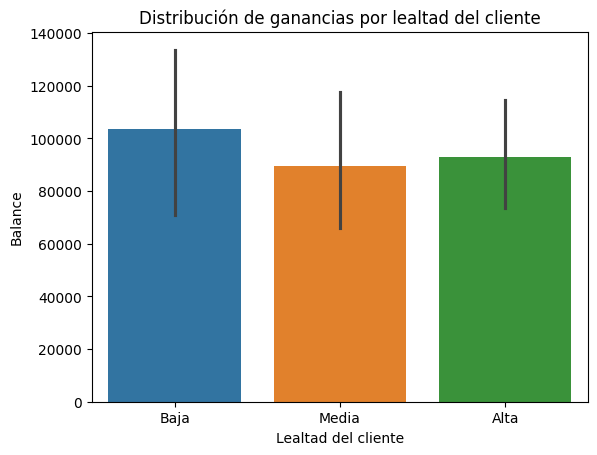

In [54]:
#Barplot de la distribución de ganancias por lealtad del cliente.
sns.barplot(df,x='Lealtad_cliente',y='Balance',estimator=sum,hue='Lealtad_cliente')
plt.title('Distribución de ganancias por lealtad del cliente')
plt.xlabel('Lealtad del cliente')

In [55]:
# Observar el porcetaje de clientes segun su tipo de lealtad.
clientes_lealtad = clasificacion.reset_index()
clientes_lealtad.columns = ['ID_cliente', 'Lealtad_cliente']
conteo = clientes_lealtad['Lealtad_cliente'].value_counts(normalize=True) * 100
conteo = conteo.round(2)
print("Porcentaje de clientes por tipo de lealtad:")
print(conteo)



Porcentaje de clientes por tipo de lealtad:
Lealtad_cliente
Baja     54.22
Media    28.50
Alta     17.28
Name: proportion, dtype: float64


Se observa que los clientes con alta lealtad generan prácticamente el mismo balance positivo que los de baja lealtad, a pesar de ser menos de un tercio en cantidad. Esto evidencia su gran valor para el negocio, por lo que resulta clave implementar campañas específicas para premiar su fidelidad. Al mismo tiempo, sería beneficioso diseñar estrategias orientadas a aumentar la lealtad de los clientes menos frecuentes.

## Insights y posibles acciones para la mejora del negocio

Una estrategia clave podría ser reducir la cantidad de estados en los que se comercializan productos, concentrándose en aquellos que resultan más rentables y en algunos con alto potencial de crecimiento. Esta decisión permitiría disminuir costos logísticos, agilizar los envíos y brindar una atención más focalizada y eficiente. Además, los propios clientes podrían beneficiarse de un servicio más rápido y económico, fortaleciendo su vínculo con la marca.

En cuanto a la rentabilidad según el nivel de lealtad, se observa que los clientes altamente leales representan solo un tercio en relación con los menos leales, pero generan prácticamente los mismos ingresos. Esto evidencia la importancia estratégica de la lealtad. Por ello, sería recomendable implementar acciones para fortalecerla, como beneficios progresivos por compras frecuentes, descuentos exclusivos o ventajas en los envíos para quienes mantengan una relación sostenida con la empresa.

El análisis temporal muestra un aumento significativo en las ventas durante el último trimestre del año, revelando una clara estacionalidad. Esta puede ser aprovechada mediante contrataciones temporales, campañas publicitarias enfocadas en ese período y la búsqueda de alianzas logísticas específicas para esos meses. Tales medidas permitirían optimizar los beneficios y, al mismo tiempo, mejorar la experiencia del cliente, fomentando su fidelización.

Respecto a las categorías de productos, tecnología se presenta como la más rentable. Además, sus artículos ocupan menos espacio que los muebles, lo que permite ahorrar en almacenamiento y transporte. En contraste, la categoría de muebles ha mostrado un bajo rendimiento e incluso pérdidas en determinados meses. Por lo tanto, podría evaluarse discontinuar esta línea e invertir en productos tecnológicos de mayor rotación, lo que también implicaría una optimización de costos operativos.

Si bien la categoría de suministros de oficina no es la que mayores beneficios genera, ha demostrado una gran estabilidad, con rendimientos especialmente buenos entre agosto y diciembre. Por este motivo, se aconseja mantenerla como parte del portafolio y considerar una mayor inversión en los meses de mejor desempeño.

En el análisis de subcategorías, impresoras, celulares y accesorios se destacan por su alta rentabilidad. Esto abre la posibilidad de diseñar combos promocionales que incluyan estos productos junto con otros relacionados, incentivando las ventas cruzadas y el crecimiento de subcategorías complementarias.

También sería valioso analizar la incorporación de notebooks como nueva subcategoría dentro del área de tecnología. Este producto tiene alta demanda, es ampliamente utilizado por consumidores, empresas y trabajadores en modalidad home office, y no requiere grandes espacios de almacenamiento. Representa una oportunidad clara para aumentar las ventas.

Por último, resulta esencial continuar atendiendo a los tres perfiles de clientes actuales. No obstante, podría ser especialmente beneficioso captar nuevas empresas que operen en modalidad home office, sobre todo durante los meses de menor actividad. Ofrecer promociones específicas durante ese período podría aportar mayor estabilidad a lo largo del año y fortalecer la posición de la empresa en ese segmento.

## Conclusión

Este proyecto buscó explorar en profundidad los datos de ventas de la empresa con el objetivo de identificar patrones, oportunidades de mejora y posibles estrategias de acción. A través de un análisis sistemático y visual, fue posible comprender no solo el desempeño comercial general, sino también cómo distintos factores impactan en la rentabilidad del negocio analizado.

El trabajo permite evidenciar el valor que puede aportar un enfoque analítico en la toma de decisiones. Detectar estacionalidades, identificar a los clientes más valiosos o repensar la oferta de productos no son solo ejercicios técnicos, sino pasos fundamentales para orientar el crecimiento del negocio de forma sostenible.

El proceso también remarcó la importancia de contar con datos limpios, normalizados y bien organizados para facilitar los análisis. Si bien hubiera sido posible avanzar con otras etapas como subirlo a un sistema de gestión de bases de datos SQL y la posterior creación de dashboards, el objetivo principal de este proyecto fue el preprocesamiento, análisis de los datos y busqueda insights. Por ese motivo, consideré más pertinente enfocar el trabajo en estas etapas iniciales y fundamentales para cualquier proceso analítico.

## Agradecimiento 

Muchas gracias por haber dedicado su valioso tiempo a la lectura de este proyecto. Quedo a disposición para cualquier consulta o sugerencia que pueda contribuir a mejorar este trabajo o futuros proyectos.